In [1]:
import pandas as pd

# Assuming your data is in a file named 'stepcount.csv'
step_file_path = 'stepcount.csv'
energy_file_path = 'energy.csv'
headphones_file_path = 'headphones.csv'
# Read the CSV file with appropriate data types and low_memory=False
df = pd.read_csv(headphones_file_path, header=1, usecols=[5, 6, 7, 8])



# Convert 'startDate' to datetime
df['startDate'].to_string

# Filter rows based on the 'startDate' column for the year 2023

df['date'] = df['startDate'].str.split().str[0]
# Group by 'startDate' and sum the 'value' column
df_summed = df.groupby('date')['value'].sum().reset_index()
df_summed = df_summed[df_summed['date'].str.split('-').str[0] == '2023']
df_summed = df_summed[df_summed['date'] >= '2023-02-10']
display(df_summed)









,date,value
90,2023-09-30,momentaryLimit


In [2]:
import pandas as pd

# Assuming your data is in a file named 'stepcount.csv'
step_file_path = 'stepcount.csv'
energy_file_path = 'energy.csv'
headphones_file_path = 'headphones.csv'

# Read the CSV files with appropriate data types and low_memory=False
df = pd.read_csv(step_file_path, header=1, usecols=[5, 6, 7, 8])
df_energy = pd.read_csv(energy_file_path, header=1, usecols=[5, 6, 7, 8])
df_headphones = pd.read_csv(headphones_file_path, header=1, usecols=[5, 6, 7, 8])

# Convert 'startDate' to datetime
df['startDate'] = pd.to_datetime(df['startDate'])
df_energy['startDate'] = pd.to_datetime(df_energy['startDate'])
df_headphones['startDate'] = pd.to_datetime(df_headphones['startDate'])

# Extract the date part from 'startDate'
df['date'] = df['startDate'].dt.date
df_energy['date'] = df_energy['startDate'].dt.date
df_headphones['date'] = df_headphones['startDate'].dt.date

# Filter rows based on the 'startDate' column for the year 2023
df_summed = df.groupby('date')['value'].sum().reset_index()
df_summed = df_summed[df_summed['date'] >= pd.to_datetime('2023-01-01').date()]

df_summed_energy = df_energy.groupby('date')['value'].sum().reset_index()
df_summed_energy = df_summed_energy[df_summed_energy['date'] >= pd.to_datetime('2023-01-01').date()]

# Calculate mode of 'calories' for each date
df_summed_headphones = df_headphones.groupby('date')['value'].sum().reset_index()
df_summed_headphones = df_summed_headphones[df_summed_headphones['date'] >= pd.to_datetime('2023-01-01').date()]

# Merge DataFrames based on 'date'
merged_df = pd.merge(df_summed, df_summed_energy, on='date', how='outer', suffixes=('_step', '_energy'))
merged_df['headphones'] = df_summed_headphones['value']

# Convert 'value_energy' to numeric
merged_df['value_energy'] = pd.to_numeric(merged_df['value_energy'])

# Assign 'value_energy' to 'calories'
merged_df['calories'] = merged_df['value_energy']

# Replace NaN values in 'calories' with the mean of 'calories'
mean_calories = merged_df['calories'].mean()
merged_df['calories'].fillna(mean_calories, inplace=True)

# Drop unnecessary columns
merged_df = merged_df[['date', 'value_step', 'calories']]

# Convert 'date' column to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Extract day and month
merged_df['day'] = merged_df['date'].dt.day
merged_df['month'] = merged_df['date'].dt.month

# Create a variable 'school' based on date conditions
merged_df['school'] = (
    (merged_df['date'].dt.month >= 6) & (merged_df['date'].dt.month <= 9) 
).astype(int)

# Display the final DataFrame
display(merged_df)


,date,value_step,calories,day,month,school
0,2023-01-01,5442.0,291.371392,1,1,0
1,2023-01-02,6811.0,291.371392,2,1,0
2,2023-01-03,7579.0,291.371392,3,1,0
3,2023-01-04,6972.0,291.371392,4,1,0
4,2023-01-05,14777.0,291.371392,5,1,0
...,...,...,...,...,...,...
328,2023-11-25,4672.0,102.795000,25,11,0
329,2023-11-26,4758.0,119.499000,26,11,0
330,2023-11-27,7710.0,236.049000,27,11,0
331,2023-11-28,10301.0,330.166000,28,11,0


In [3]:

print(merged_df.dtypes)


date          datetime64[ns]
value_step           float64
calories             float64
day                    int64
month                  int64
school                 int32
dtype: object


In [4]:
new_df = merged_df.drop('date', axis=1)
display(new_df)

,value_step,calories,day,month,school
0,5442.0,291.371392,1,1,0
1,6811.0,291.371392,2,1,0
2,7579.0,291.371392,3,1,0
3,6972.0,291.371392,4,1,0
4,14777.0,291.371392,5,1,0
...,...,...,...,...,...
328,4672.0,102.795000,25,11,0
329,4758.0,119.499000,26,11,0
330,7710.0,236.049000,27,11,0
331,10301.0,330.166000,28,11,0


Mean Squared Error (Regression) for calories: 4858.608080582566


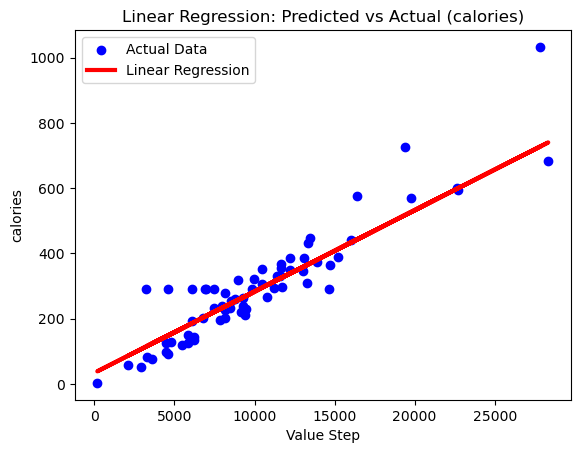

Mean Squared Error (Regression) for day: 68.9275173622563


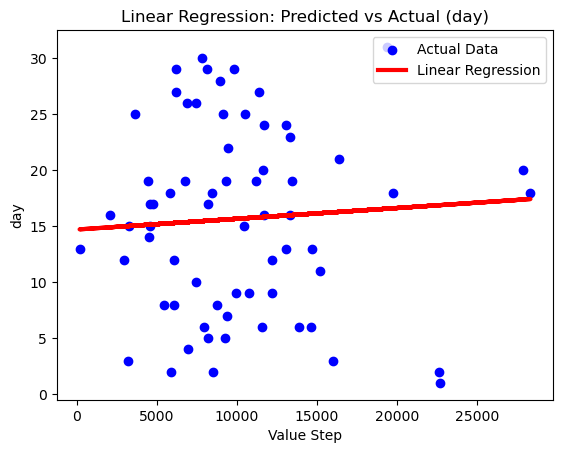

Mean Squared Error (Regression) for month: 11.059848513364997


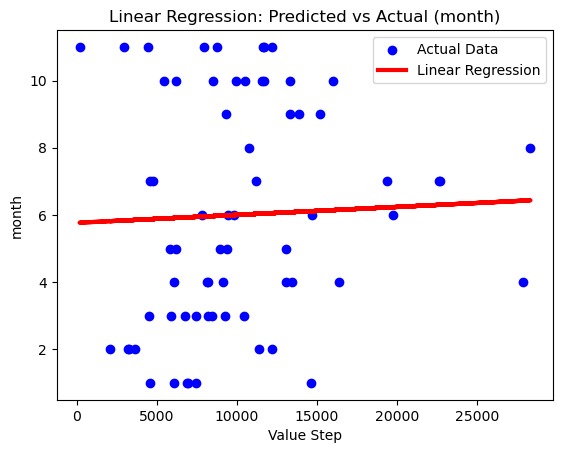

Mean Squared Error (Regression) for school: 0.18955479543158552


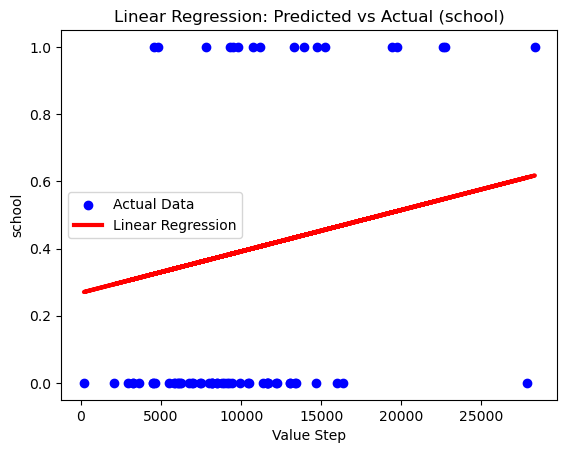

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'new_df' is your DataFrame
X = new_df[['value_step']]
y = new_df.drop('value_step', axis=1)  # Assuming 'calories' and 'other_variable' are target variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model for each target variable
reg_models = {}
reg_predictions = {}
reg_mse = {}

for column in y.columns:
    reg_model = LinearRegression()
    reg_model.fit(X_train, y_train[column])

    # Make predictions on the test set
    reg_models[column] = reg_model
    reg_predictions[column] = reg_model.predict(X_test)
    reg_mse[column] = mean_squared_error(y_test[column], reg_predictions[column])
    print(f'Mean Squared Error (Regression) for {column}: {reg_mse[column]}')

    # Plot the linear regression line for each target variable
    plt.scatter(X_test['value_step'], y_test[column], color='blue', label='Actual Data')
    plt.plot(X_test['value_step'], reg_predictions[column], color='red', linewidth=3, label='Linear Regression')
    plt.title(f'Linear Regression: Predicted vs Actual ({column})')
    plt.xlabel('Value Step')
    plt.ylabel(column)
    plt.legend()
    plt.show()
                                            

Accuracy (Logistic Regression): 0.6119402985074627


C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


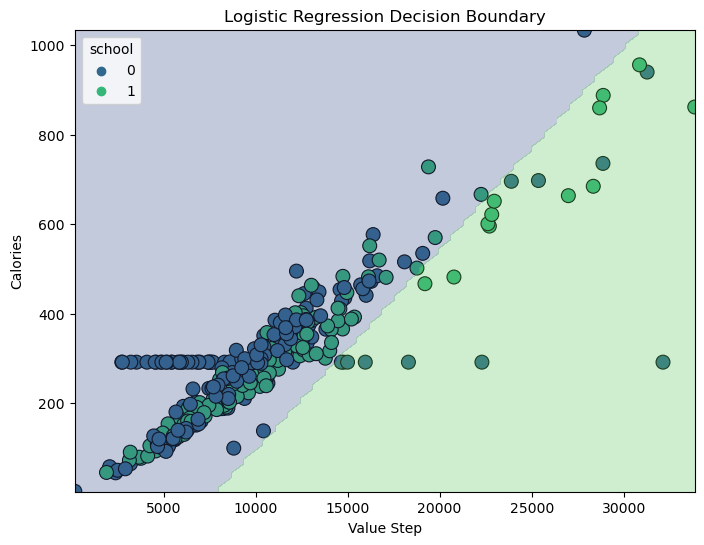

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# Assuming 'new_df' is your DataFrame
X_logreg = new_df[['value_step', 'calories', 'day', 'month']]
y_logreg = new_df['school']

# Split the data into training and testing sets
X_logreg_train, X_logreg_test, y_logreg_train, y_logreg_test = train_test_split(X_logreg, y_logreg, test_size=0.2, random_state=42)

# Train a logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_logreg_train, y_logreg_train)

# Make predictions on the test set
logreg_predictions = logreg_model.predict(X_logreg_test)

# Evaluate the logistic regression model
logreg_accuracy = accuracy_score(y_logreg_test, logreg_predictions)
print(f'Accuracy (Logistic Regression): {logreg_accuracy}')

# Plot the decision boundary using sampled points
plt.figure(figsize=(8, 6))

# Scatter plot for the two classes
sns.scatterplot(x='value_step', y='calories', hue='school', data=new_df, palette='viridis', edgecolor='k', s=100)

# Sample points from the feature space
x_min, x_max = X_logreg['value_step'].min() - 1, X_logreg['value_step'].max() + 1
y_min, y_max = X_logreg['calories'].min() - 1, X_logreg['calories'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
# I do not know what the above line does

# Predict the class labels for sampled points
Z = logreg_model.predict(np.c_[xx.ravel(), yy.ravel(), np.ones_like(xx.ravel()) * X_logreg['day'].mean(), np.ones_like(yy.ravel()) * X_logreg['month'].mean()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis', levels=[-1, 0, 1], linestyles='dashed')

# Set labels and title
plt.xlabel('Value Step')
plt.ylabel('Calories')
plt.title('Logistic Regression Decision Boundary')

# Show the plot
plt.show()


In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_cls = new_df[['value_step', 'day', 'calories']]
y_cls = new_df['school']

# Split the data into training and testing sets
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Train a logistic regression model
cls_model = LogisticRegression()
cls_model.fit(X_cls_train, y_cls_train)

# Make predictions on the test set
cls_predictions = cls_model.predict(X_cls_test)

# Evaluate the classification model
cls_accuracy = accuracy_score(y_cls_test, cls_predictions)
print(f'Accuracy (Classification): {cls_accuracy}')

Accuracy (Classification): 0.7761194029850746


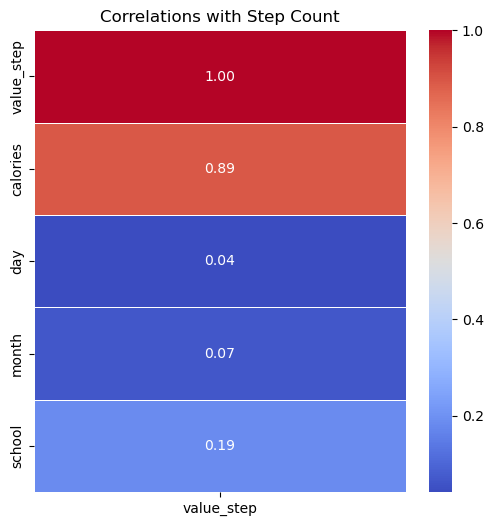

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_df' is your DataFrame
correlation_matrix = new_df.corr()

# Select the column corresponding to 'value_step'
step_count_correlations = correlation_matrix['value_step']

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(step_count_correlations.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=.5)
plt.title('Correlations with Step Count')
plt.show()


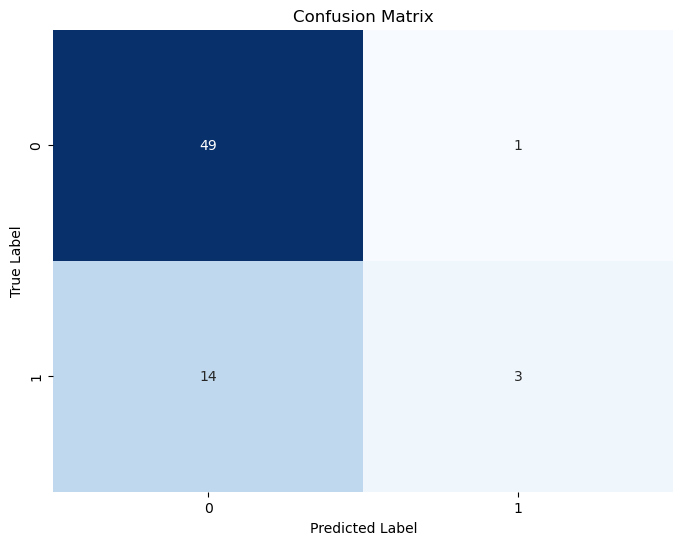

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87        50
           1       0.75      0.18      0.29        17

    accuracy                           0.78        67
   macro avg       0.76      0.58      0.58        67
weighted avg       0.77      0.78      0.72        67



In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'cls_predictions' and 'y_cls_test' are already defined

# Plot confusion matrix
conf_matrix = confusion_matrix(y_cls_test, cls_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=cls_model.classes_, yticklabels=cls_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
cls_report = classification_report(y_cls_test, cls_predictions)
print('Classification Report:\n', cls_report)


Accuracy (Decision Tree): 0.7761194029850746


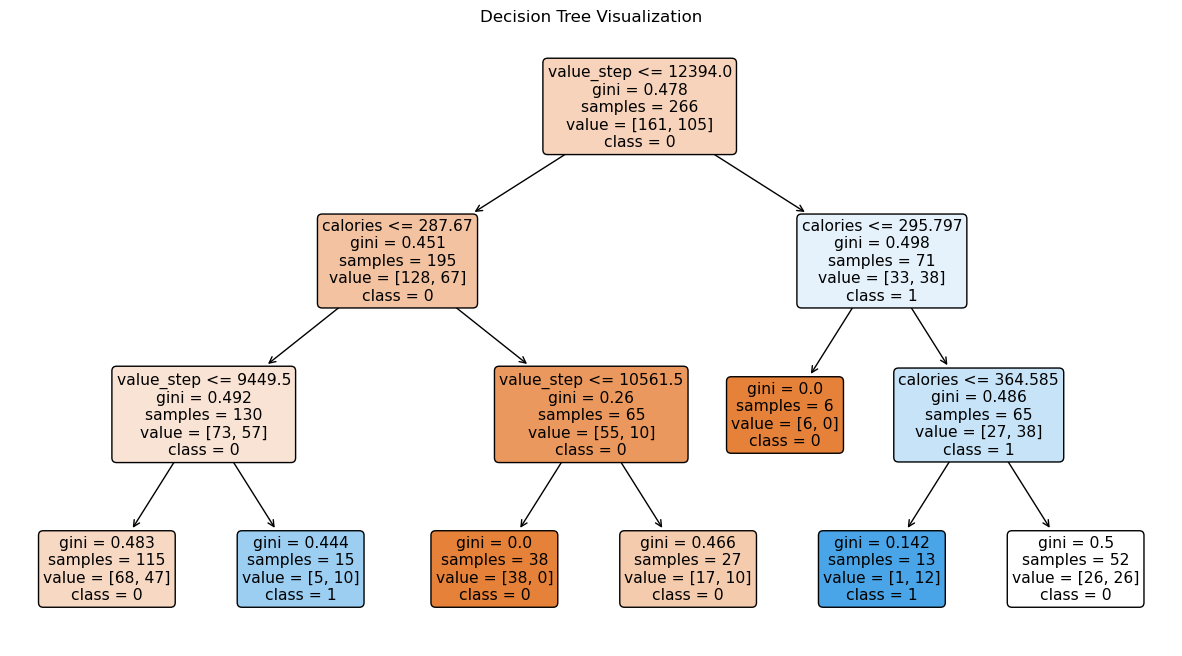

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming 'new_df' is your DataFrame
X_cls = new_df[['value_step', 'day', 'calories']]
y_cls = new_df['school']

# Split the data into training and testing sets
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Train a decision tree classifier
dt_model = DecisionTreeClassifier(max_depth=3)  # Adjust the depth as needed

dt_model.fit(X_cls_train, y_cls_train)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_cls_test)

# Evaluate the decision tree classifier
dt_accuracy = accuracy_score(y_cls_test, dt_predictions)
print(f'Accuracy (Decision Tree): {dt_accuracy}')

# Visualize the decision tree with a larger figure size
plt.figure(figsize=(15, 8))
plot_tree(dt_model, feature_names=X_cls.columns, class_names=[str(c) for c in dt_model.classes_], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()
